# Introduction to the FluxEngine tutorials
These tutorials are written using Jupyter, which allows the creation of notebooks that combine text embedded Python and/or commandline code in a format which can be viewed from a web browser. This allows code to appear alongside their explanations and you can run code and modify examples live from within the web browser.

Embedded Python code looks like this:

In [ ]:
#this is a python example
print "Hello Jupyter!"

To run this example, click in the cell (box) containing the example code and then click the "Run" button on the tool bar at the top.
<img src="images/run_button.png" width="600">
Any code in the selected cell will run and any output will appear below it - in this case the words "Hello Jupyter!" These code cells are editable allowing you to modify parts of the code and test your changes by re-running them. Try modifying the code above to print a different message and run it again.

FluxEngine has several command line tools that provide different functionality. We'll be running these tools through Jupyter notebooks in order to keep everything together in a single document, but usually you would use Command Prompt (Windows) or Terminal (MacOS and Linux) to run them. In these notebooks, command line commands are distinguished from Python code by an exclamation mark (`!`) prefix before the command. For example:

In [ ]:
!echo "Hello command line!"

Running this will invoke the `echo` program from the command line, which is the equivalent to the `print` function in Python.

# Setting the working directory
When you first open a Jupyter notebook the working directory is set to the directory containing the Jupyter notebook. For most of the exercises in this tutorial we'll want the working directory to be set to the root FluxEngine directory, which is one directory up. Set the working directory by running the code below (don't worry if you don't understand it, the important thing is that you run it at the start):

In [ ]:
#This code changes the working directory from the tutorial folder to the root FluxEngine folder.
import os
if os.path.basename(os.getcwd()) != "FluxEngine":
    os.chdir(os.path.join("..",".."))
print "Working directory is now:", os.getcwd()

# Getting setup with FluxEngine
Hopefully you have already downloaded and installed FluxEngine prior to this workshop. It you haven't you should do this now. To download the latest version go to the git hub repository [here](https://github.com/oceanflux-ghg/FluxEngine/).

FluxEngine uses several third party libraries and tools. A script is included in the download to automatically install these dependencies for MacOS and Linux, and installation instructions are included for Windows in the instructions (see section 3 of [the instructions](https://github.com/oceanflux-ghg/FluxEngine/blob/master/FluxEngineV3_instructions.pdf)). If you haven't done this already you should do this now.

# Verifying FluxEngine has been installed correctly
It is important to verify that FluxEngine, and its dependencies, have been installed correctly. This will prevent problems arising later, and gives us confidence that the flux calculation is being performed correctly by running a known scenario and comparing it to previously published data. This is all handled automatically using a verification script. If you have already ran the verification script when you installed FluxEngine you do not have to do this again. If you haven't already, then do this by running the code below. It will take about ten minutes to run, but you can continue with the rest of the tutorial while you wait, remembering to check back to make sure you received a message saying "Validation successful! All values are within threshold limits" when it has finished.

In [ ]:
#Run the verification script.
!python verify_socatv4_sst_salinity_gradients_N00.py

<div class="alert alert-block alert-info">
<b>Command line help</b> - If you've never used the command line to run something before, don't worry it's easy! Command Prompt (on Windows, Terminal on MacOS and Linux) provides a way to type commands to your operating system instead of using the graphical user interface. This means you can run tools which do not have graphical user interfaces and also gives you a way to automate and document the analysis steps you have done (e.g. by saving the commands to a file). Lots of tools (especially free/open source scientific ones!) don't have graphical user interfaces (including FluxEngine, for now at least) simply because they can be very time consuming to build and maintain.
    
The anatomy of a command line command looks like this:
```
program_to_run options
```
Where `program_to_run` is the name or path to the program to run, and `options` is a list of options (sometimes prefixed with a dash `-` or double-dash `--`) containing the parameters you are using with the command. In the case of the command above: `!python verify_socatv4_sst_salinity_gradients_N00.py` the `!` tells the Jupyter notebook that what follows should understood as a command line command, `python` is the name of the program to run (the Python interpreter), and we use a single option `verify_socatv4_sst_salinity_gradients_N00.py`. Here the option is the path of the script we want to run. The path is relative to our working directory (which we have already set to be the FluxEngine root directory), and so the whole command runs FluxEngine's verification script using the Python interpreter.
</div> 

# Creating a custom configuration file
For the remainder of this tutorial we will create a new run configuration, based on the verification run but with a number of changes, and then visualise the output. To do this, you'll first need to understand FluxEngine configuration files.

FluxEngine uses plain text configuration files to specify input data and to select options that change how the flux calculation is performed. We'll be using the configuration file from the verification run as the basis for our new FluxEngine run, but it's important not to modify the original file otherwise future verification runs may not work. You could copy the configuration file with your file browser, but here's some Python code to do that for you:

In [ ]:
import os.path as path;
import shutil;
try:
    shutil.copy(path.join("configs", "socatv4_sst_salinity_gradients-N00.conf"), path.join("Tutorials", "01_introduction", "custom_config.conf"));
    print "Configuration file copied successfully."
except e:
    print "There was a problem copying the configuration file. Check your working directory is correct."
    print e

## Anatomy of a configuration file
We now have made a new configuration file based on the verification run, lets open it. You can find it here `FluxEngine/Tutorials/01_introduction/custom_config.conf`. Use a text editor such as Notepad++ to open this file and view its contents.

<div class="alert alert-block alert-warning">
<b>Opening config files: </b> Configuration files are plain text formatted files and can be opened in software such as Notepad, Notepad++ or TextEdit. You should not use Microsoft Word or other word processing software to edit configuration files because they can add invisible formatting characters to files which can prevent the FluxEngine interpretting the file correctly. On some older Windows systems configuration files may display all on one line. The easiest way to avoid this is by [installing Notepad++](https://notepad-plus-plus.org/download/v7.7.html) (a free lightweight text editor), and using this to edit configuration files.
</div>

Configuration files contain a list of options/setting names assigned to values using the format `option = value`. The order that options are defined does not matter but it is often useful to group related options together. Any text preceeded by a `#` symbol is a comment. Comments provide helpful information about what a particular setting, or group of settings, does. It isn't necessary to understand all of the settings at this point, but see if you can identify where the following settings are defined by reading the comments:
 - Where is input data specified? What types of input data are supplied (e.g. salinity data)?
 - Where is the flux calculation selected? Which flux equation (e.g. the 'rapid' or 'bulk') does the verification run use?
 - Where is gas transfer velocity parameterisation specified?
 - Where is the output directory is set? Optional: Locate the output directory and open some one of the files (see the information box below for help).

If you want to find out more information about a particular setting you can look the description in [the instructions](https://github.com/oceanflux-ghg/FluxEngine/blob/master/FluxEngineV3_instructions.pdf), (see section 7.2).

<div class="alert alert-block alert-info">
<b>Opening netCDF files:</b> FluxEngine uses netCDF files for input and creates netCDF files to store the output. The easiest way to open netCDF files is to use Panoply (or similar software) that provides a graphical user interface to open, view and plot data in netCDF format. You can download Panoply for Mac, Windows or Linux [here](https://www.giss.nasa.gov/tools/panoply/). Alternatively, you can use a programming language such as Python, R or Matlab to read netCDF files and plot them. This is beyond the scope of these tutorials, and it is recommended that you use Panoply unless you already have experience reading and plotting netCDF files.
</div> 

## Modifying the config file

### Specifying input data
FluxEngine requires a minimum of six types of input data to perform the flux calculation. These are:
- Sea surface temperature (skin, sub-skin or both)
- Salinity
- Air pressure
- Wind speed
- Aqueous gas (partial pressure, fugacity or concentration)
- Atmospheric gas (partial pressure, fugacity or concentration)

Each input dataset is described as a 'data layer', within FluxEngine. These are supplied as netCDF (.nc) files. NetCDF files can store several geospatial variables together in one file along with metadata (description, units, expected range, etc.) and information about the dimensions (spatial and temporal coordinates). The figure below shows a netCDF file opened in Panoply with the list of variables circled on the left and the dimensions that the data uses on circles on the right.

<img src="images/netcdf_anatomy.png" width="600">

If you click on a variable you can see meta data about that variable, such as the units and the dimensions used by this variable (not every variable will use every dimension). In the below picture we've selected the `sst_skin_mean` variable and we can read the metadata about the variable on the left hand side (units and dimensions are highlighted).

<img src="images/netcdf_anatomy_pt2.png" width="600">


To define an input data layer in the FluxEngine configuration file we need to specify a file path and a 'product' name. The product name is just the name of the variable in the netCDF file (e.g. `sst_skin_mean` in the above example). An example from the current configuration file that specifies the wind speed input data is
```
windu10_path = data/validation_data/globwave/<YYYY>/<YYYY><MM>_OCF-WSP-GLO-1M-100-MGD-GW-v2.nc
windu10_prod = wind_speed_cor_mean
```

We're defining the file path to our wind speed netCDF file using `windu10_path`, and the product name using `windu10_prod`. Notice that tokens are used to represent the year and month (`<YYYY>` and `<MM>`). These are substituded for the numerical representation of the current year and month when FluxEngine runs, allowing different input files to be selected for different time steps.

We will use an updated salinity dataset from the World Ocean Atlas (WOA) for our custom flux calculation. Find the section of the configuration file which defines the salinity input and modify them to look like this:

```
salinity_path = Tutorials/01_introduction/data/WOA_salinity/surface_woa18_A5B7_s<MM>_01.nc
salinity_prod = salinity_mean
```

If you open one of the WOA salinity data netCDF files using Panoply there are three variables, `lon`, `lat` and `mean_salinity`. The first two define the lon-lat grid and the last contains the mean monthly sea surface salinity. We want to use the sea surface salinity, which is why we set `salinity_prod = salinity_mean`.

<div class="alert alert-block alert-info">
<b>Extra info:</b> There is a general pattern to specifying data layers which is `datalayername_suffix`. You've already seen the use of the `_path` and `_prod` suffix to define file paths and product names, but others can be used to define, for example, minimum and maximum allowed bounds for the input data, to perform preprocessing such as unit conversions. [The instructions](https://github.com/oceanflux-ghg/FluxEngine/blob/master/FluxEngineV3_instructions.pdf) (section 7.6.1) provides more information on using these suffixes to change the way specific input data layers are handled.
</div>

### Selecting a gas transfer velocity parameterisation
We'll use a more recent wind-based gas transfer velocity parameterisation too. Find the line that starts `k_parameterisation`. It's currently set to use the parameterisation described by [Nightingale et al., 2000](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/1999GB900091). There are lots of different gas transfer velocity parameterisations built in to FluxEngine, and users can also use Python to write their own. We'll stick to using a build-in parameterisation for now (the most common ones are are listed in the comments of the configuration file. Set `k_parameterisation = k_Wanninkhof2014`, which tell FluxEngine to use the updated parameterisation described by [Wanninkhof, Limnology and Oceanography: Methods, 2014] (https://aslopubs.onlinelibrary.wiley.com/doi/pdf/10.4319/lom.2014.12.351).

We'll also update the Schmidt number parameterisation to use the relationship described in the same paper. Currently the configuration file doesn't define a Schmidt number parameterisation and so it will use the default version which is a little outdated now. Add a new line to the configuration file that reads `schmidt_parameterisation = schmidt_Wanninkhof2014`. Now our gas transfer parameterisation and Schmidt number calculation will be consistent. Note that it doesn't matter where you add this line, but it might help you find it again if you add it near the k parameterisation line.

### Setting the output directory
Finally we need to change the output directory, otherwise we will overwrite the output produced by the verification run. Set the `output_dir` setting in the configuration file to `output/tutorial_output_introduction`.

By default, FluxEngine will sort output files into subdirectories based on year and month. We're only going to run our new configuration file for a single month, so we can overwrite the output directory structure by adding the following line:

`output_structure =`

We purposefully leave the value empty, telling FluxEngine that we don't need any additional directories to be created and to just put output files in the root output directory (i.e. the one defined in `output_dir`).

Make sure you save the configuration file. Remember if you want more information about a particular configuration file option you can look in section 7.2 of [the manual](https://github.com/oceanflux-ghg/FluxEngine/blob/master/FluxEngineV3_instructions.pdf).

## Running FluxEngine with our custom configuration
Now all that's left to do is to run FluxEngine with the new configuration file! There are two ways to run FluxEngine. The first is using the commandline tool and specifying a configuration file, a start date and a stop date as option. The second is to import FluxEngine as a Python module and write a custom script to drive it. We'll be using the commandline tool approach because it doesn't assume knowledge of Python. The commandline tool can do nearly everything the Python module can. The only advantage of using the Python module is that it allows you to embed FluxEngine calculation in other code and/or use a single configuration file as a template and update the individual values programmatically to perform lots of variations on a particular configuration (e.g. as part of a sensitivity analysis).

The commandline tool (which is written in Python) can be run by running `python ofluxghg_run.py "Tutorials/01_introduction/custom_config.conf" -s "2010-01-01" -e "2010-01-31"` in your Command Prompt (Windows) or Terminal (MacOS/Linux) window. The first part of the command `python ofluxghg_run.py` tell your computer to use Python to run the commandline tool which will in turn setup and run FluxEngine. The next part of the command specifies the path to the configuration file to use. Next the `-s` and `-e` specify the start and end dates, which are provided in the `YYYY-MM-DD`. For more information on using the `ofluxghg_run.py` tool you can run it with the `-h` comment ('h' for help) or see [the instructions](https://github.com/oceanflux-ghg/FluxEngine/blob/master/FluxEngineV3_instructions.pdf) (section 5.1).

<div class="alert alert-block alert-info">
<b>The `!` prefix:</b> Remember that code which starts with `!` is interpretted as a command line instruction, and is equivalent to entering the command (without the `!`) into your command prompt (Windows) or terminal (Mac/Linux) window.
</div>

Run the command below to perform our new flux calculation. Notice, to minimise execution time we have set the end date to the end of January so that we only calculate the fluxes for a single month.

In [ ]:
!python ofluxghg_run.py "Tutorials/01_introduction/custom_config.conf" -s "2010-01-01" -e "2010-01-31"

<div class="alert alert-block alert-info">
<b>Command line help (part 2)</b> - In the above command `!python ofluxghg_run.py "Tutorials/01_introduction/custom_config.conf" -s "2010-01-01" -e "2010-01-31"` we're using Python (`python`) to run a Python script (`ofluxghg_run.py`). That Python script is a program that runs FluxEngine and itself uses options to tell it what to run. So after specifying the Python script, we also specify a list of parameters for the script to use. The first (and only mandatory) of these is the path to the FluxEngine configuration file (`Tutorials/01_introduction/custom_config.conf`). Next are two optional parameters which specify the start date and end dates. Optional parameters start with a `-` or `--` and often appear as name value pairs (e.g. the name `-s` appears before the value `2010-01-01`).
</div> 

## Visualising output
If all has gone well you'll see a log of the FluxEngine run and a message at the end saying 'completed successfully'. If you look at the output directory `output/tutorial_output_introduction/` you should see a file called `OceanFluxGHG-month01-jan-2010-v0.nc`. If you have Panoply installed, you can open this file directly and look at its contents.

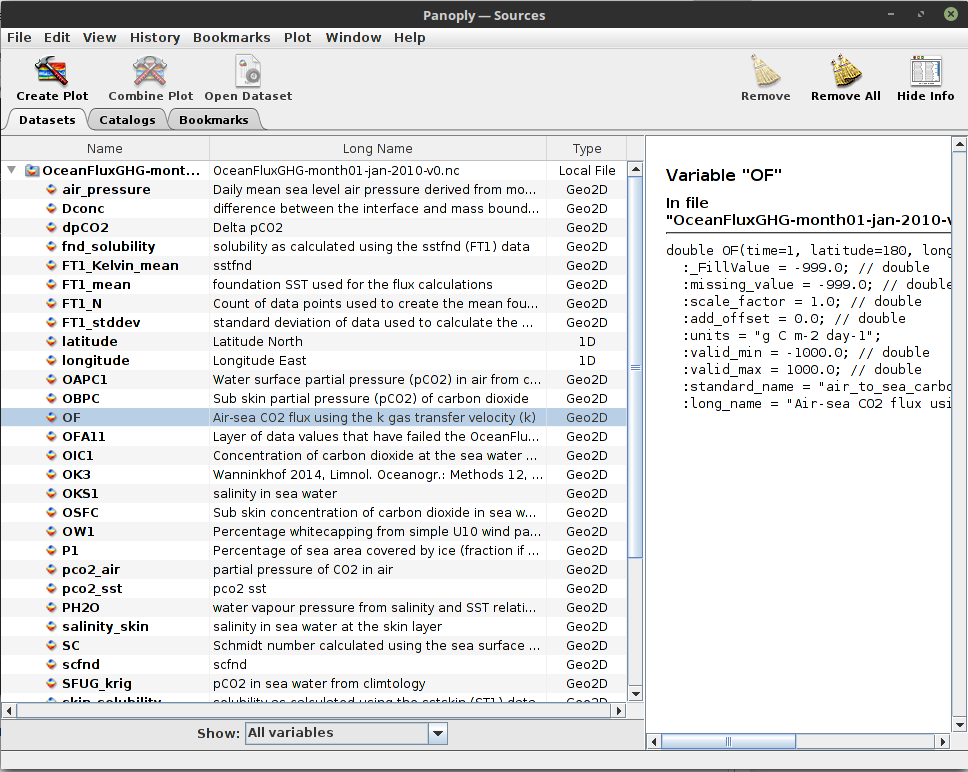

If you double click a variable name (e.g. 'OF' - the air-sea gas flux) Panoply will give you the option to plot it. Spend some time exploring the FluxEngine outputs. Outputs that may be of interest are the air-sea gas flux (OF), the gas transfer velocity (OK3) and the interface and aqueous gas concentrations (OIC1 and OSFC, respectively). You'll also notice that a copy of the input datasets are provided in the output file. This makes it convenient to see what values were used to make the calculation.

Plotting in Panoply is fine, but it is not very flexible (for example, what if we want to compare the calculated CO<sub>2</sub> fluxes between the verification run and our custom run). You can export data to a .csv file by right clicking on a variable and choosing one of the export options. Then you could import the data into your preferred data visualisation / analysis software and perform any operations you like. However, since we're already running a Python interpretter in this Jupyter notebook, we might as well do this directly with Python! Lets compare the air-sea CO<sub>2</sub> fluxes between the verification and custom runs now, and don't worry if you don't follow the Python - R and Matlab both provide their own libraries for importing data stored in netCDF files.

In [ ]:
from netCDF4 import Dataset #allows reading of netCDF files
import matplotlib.pyplot as plt #for plotting data
import numpy as np #matrix manipulation

verificationNetCDF = Dataset("output/validate_socatv4_sst_salinity_N00/2010/01/OceanFluxGHG-month01-jan-2010-v0.nc", 'r') #Read the January data from the verification run
verificationFlux = verificationNetCDF.variables["OF"][:] #Extract the flux data from the 'OF' variable in the netCDF file

customNetCDF = Dataset("output/tutorial_01_introduction/OceanFluxGHG-month01-jan-2010-v0.nc", 'r') #Read the January data from the custom run
customFlux = customNetCDF.variables["OF"][:] #Extract the flux data from the 'OF' variable in the netCDF file

fluxDifference = customFlux - verificationFlux #Calculate the change in calculated flux
fluxDifference = np.squeeze(fluxDifference) #remove any dimensions of size 1 (in this case, the time dimension)

#plot the differences in flux
plt.figure(figsize=(8, 8))
plt.imshow(fluxDifference)
cbar = plt.colorbar(orientation="horizontal")
cbar.set_label(r"Difference in flux (gC m$^{-2}$ s$^{-1}$)", fontsize=16)


Not the nicest looking figure, but good enough for an exploratory look at the results! You can see that the difference between the calculated fluxes is largest around regions where there are typically high wind speeds (open the `WS1_mean` variable in the FluxEngine output using Panoply if you want to compare. The change in salinity data is unlikely to have a big effect, and so it seems likely that these differences are due to the updated gas transfer velocity parameterisation.

# Next tutorial
Next, we'll look at how to use FluxEngine to calculate gas fluxes using in situ data. Return to the Jupyter dashboard and open the notebook stored in [Tutorials/02_using_insitu_data/02_using_insitu_data.ipynb](../02_using_insitu_data/02_using_insitu_data.ipynb).